### Implementing a k-means Clustering algorithm with sklearn
K-means is a clustering algorithm that partition n datapoints/observations into k clusters.In these models(centriod), the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.

This algorithm works in these 4 steps:

1. Initialisation: Choose Initial K “means”(centroids) at random
2. Assignment: Associate each observation with the nearest centroid
3. Update: calculate the centroid of each cluster formed, and assign the new centroid as the new "mean "of the clusters
4. Step 2 and 3 are repeated iteratively until convergence

The result is the sum of squared errors is minimised between observation and their respective centroids.

##### some advantages of KMeans:

simple, easy to implement

k-means becomes a great solution for pre-clustering, reducing the space into disjoint smaller sub-spaces where other clustering algorithms can be applied.

Works great if clusters are spherical

##### Some disadvantages of KMeans:

Need to choose k value

sensitive to outliers

sensitive to initial points and local optimal, and there is no unique solution for a certain K value: thus run K mean for a K value lots of times(20-100times), then pick the results with lowest J


#### Dataset
Iris Plants Database:The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

In [57]:
import pandas as pd
import numpy as np
from collections import Counter
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
% matplotlib inline

In [10]:
# read the iris data
data = pd.read_csv("data/iris.csv")
data.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# get the number of datapoints in iris dataset
data.shape

(150, 5)

In [17]:
# separate class label from features
features=data.loc[:,data.columns != "class"]
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
labels= data['class']
labels.head()
labels=LabelEncoder().fit_transform(labels)


#### Visualise the data
Before we run Kmeans algorithm on this data, its important to have a look at the data. We will do this by plotting two scatter plots. One looking at the Sepal values and another looking at Petal. We will also set it to use some colours so it is clearer.

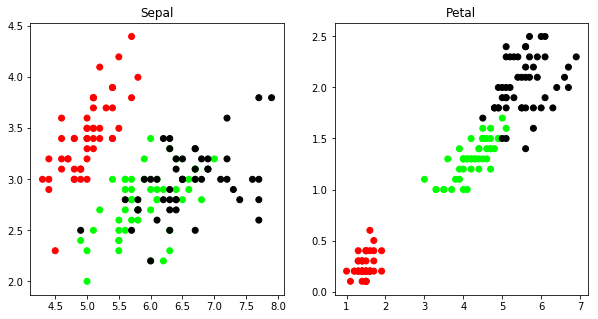

In [55]:

# Set the size of the plot
plt.figure(figsize=(10,5))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(features.sepal_length, features.sepal_width, c=colormap[labels])
plt.title('Sepal')
 
plt.subplot(1, 2, 2)
plt.scatter(features.petal_length, features.petal_width, c=colormap[labels])
plt.title('Petal')

As we can see from the above graph, both sepal and petal feature separate one class very clearly, but two other classes overlap.

#### Apply Kmeans Algorithm

Now lets apply Kmeans algorithm and see how it groups differnt classes.First we create the model and specify the number of clusters the model should find (n_clusters=3) next we fit the model to the data.


In [62]:
km=KMeans(n_clusters=3)
km.fit(features)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

#### Visualise the results
Lets plot the actual classes against the predicted classes for petal feature from the K Means model.

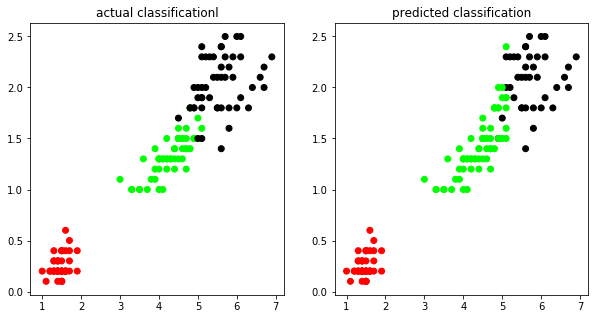

In [63]:
# Set the size of the plot
plt.figure(figsize=(10,5))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# actual classification
plt.subplot(1, 2, 1)
plt.scatter(features.petal_length, features.petal_width, c=colormap[labels])
plt.title('actual classificationl')
 
# predicted classification
plt.subplot(1, 2, 2)
plt.scatter(features.petal_length, features.petal_width, c=colormap[km.labels_])
plt.title('predicted classification')

From the above graph we can see,one class(in red) is completed predicted correctly(put into a cluster), while other 2 classes are not separated that much.In result was expected, because as we had seen in ealrlier graph that few features of those two class overlap.Hence, no matter what random centeroid we choose, we will end up few observation in wrong cluster for two classes.

#### Accuracy

There are a number of ways in which we can measure a classifiers performance.We will calculate the accuracy and also the confusion matrix.We need to values 'labels' which is the true (original) values and 'km.labels_' which are the models values.

In [69]:
import sklearn.metrics as sm
# Performance Metrics
sm.accuracy_score(labels,km.labels_)

0.89333333333333331

The model is 89% accurate.

Another way to mesaure accuracy is by creating Confusion matrix, which indicates how many instances of each class is correctly classified and how many got wrong classified.

In [68]:
# Confusion Matrix
sm.confusion_matrix(labels, km.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

As we can see, one of the class is completely predicted correctly and other two classes instances were put into wrong clusters. 

References:

https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/

http://scikit-learn.org/stable/modules/clustering.html